In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import string

In [2]:
# Function to clean and preprocess text data
def preprocess_text(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return text

In [3]:
# Function to get top words from text series
def get_top_words(text_series, top_n, ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    matrix = vectorizer.fit_transform(text_series)
    word_count = np.asarray(matrix.sum(axis=0)).ravel()
    words = np.array(vectorizer.get_feature_names_out())
    words_df = pd.DataFrame({'word': words, 'count': word_count})
    return words_df.sort_values(by='count', ascending=False).head(top_n)


In [4]:
# Load the dataset
zomato_df = pd.read_csv('zomato.csv')

In [5]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
# Data Cleaning and Preprocessing
zomato_df = zomato_df.drop(columns=['url', 'phone', 'dish_liked'])
zomato_df.dropna(how='any', inplace=True)
zomato_df.drop_duplicates(inplace=True)

In [7]:
zomato_df = zomato_df.rename(columns={'approx_cost(for two people)': 'cost',
                                      'listed_in(type)': 'type',
                                      'listed_in(city)': 'city'})


In [8]:
zomato_df['rate'] = pd.to_numeric(zomato_df['rate'].str.replace('/5', '').str.strip(), errors='coerce')
zomato_df['cost'] = zomato_df['cost'].str.replace(',', '.').astype(float)

zomato_df['reviews_list'] = zomato_df['reviews_list'].apply(preprocess_text)
zomato_df['cuisines'] = zomato_df['cuisines'].apply(preprocess_text)


<ipython-input-9-02106edd8637>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=famous_restaurants.index, y=famous_restaurants, palette='tab10')


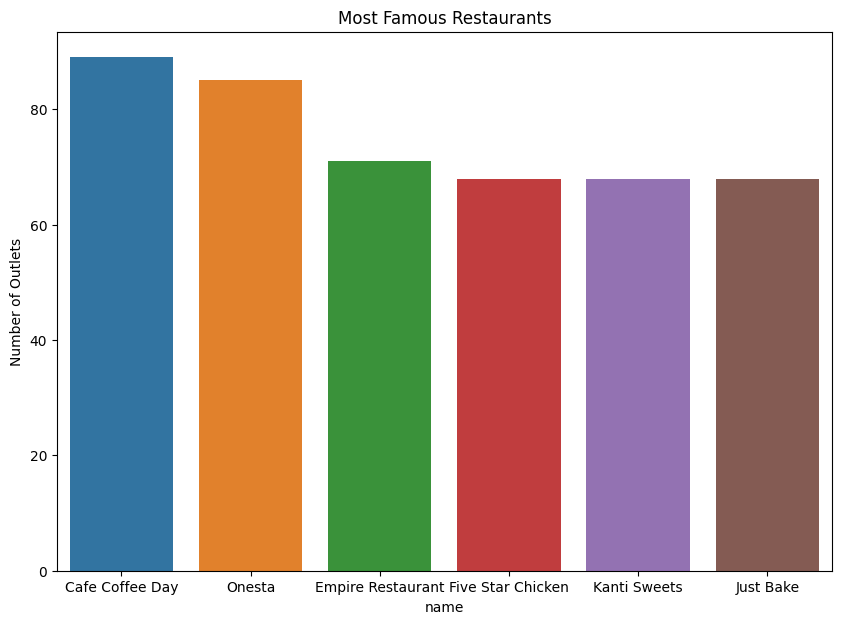

In [9]:
# Visualizations
plt.figure(figsize=(10, 7))
famous_restaurants = zomato_df['name'].value_counts()[:6]
sns.barplot(x=famous_restaurants.index, y=famous_restaurants, palette='tab10')
plt.title('Most Famous Restaurants')
plt.ylabel('Number of Outlets')
plt.show()


<ipython-input-10-5313db2b668f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zomato_df['rate'], kde=False, color='b', ax=ax, bins=20)


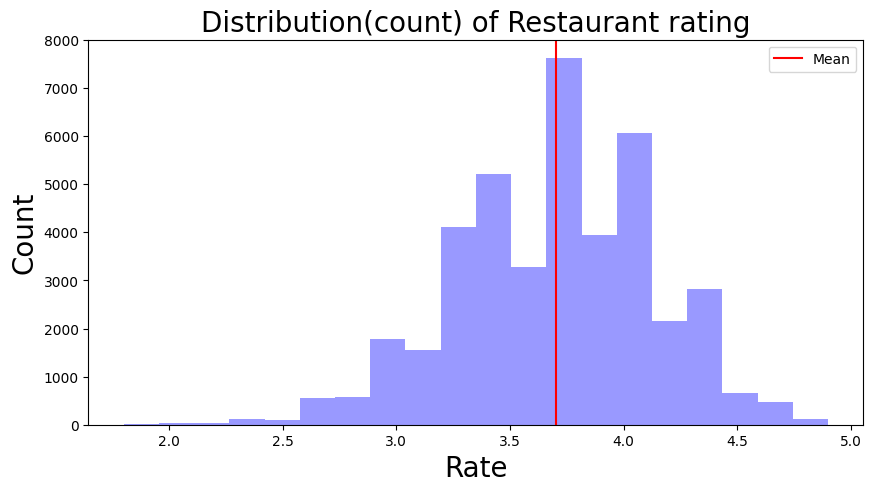

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.distplot(zomato_df['rate'], kde=False, color='b', ax=ax, bins=20)
ax.axvline(zomato_df['rate'].mean(), 0, 1, color='r', label='Mean')
ax.legend()
ax.set_ylabel('Count', size=20)
ax.set_xlabel('Rate', size=20)
ax.set_title('Distribution(count) of Restaurant rating', size=20)
plt.show()


In [11]:
# Top Rated 10 Restaurants Visualization
df_rating = zomato_df.groupby('name', as_index=False)['rate'].mean().round(2)
df_rating = pd.DataFrame({'name': df_rating['name'], 'Mean Rating': df_rating['rate']})
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)


<ipython-input-12-d74e00c358eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rating, x='Mean Rating', y='name', palette='RdBu')
C:\Users\INFINITY\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\INFINITY\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


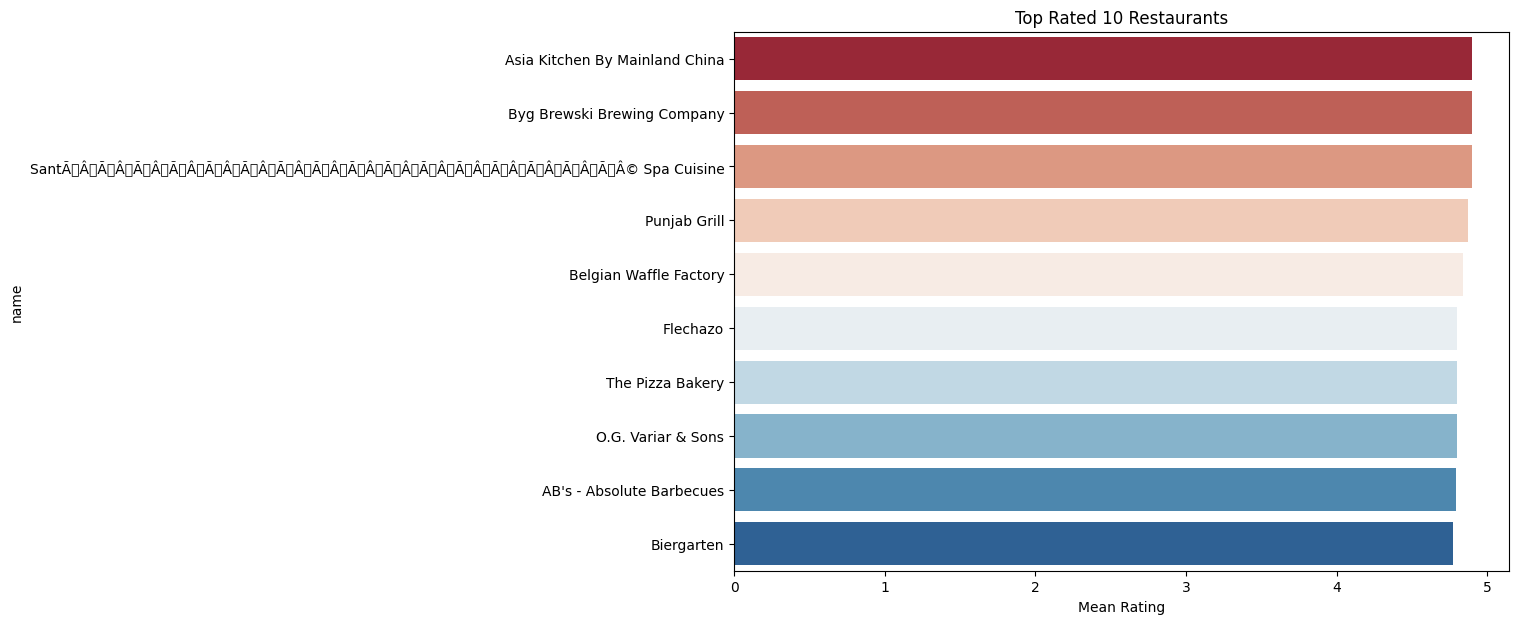

In [12]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_rating, x='Mean Rating', y='name', palette='RdBu')
plt.title('Top Rated 10 Restaurants')
plt.show()


In [13]:
# Word Couple Frequency for Cuisines Visualization
lst = get_top_words(zomato_df['cuisines'], 15, (2, 2))
df_words = pd.DataFrame(lst, columns=['word', 'count'])


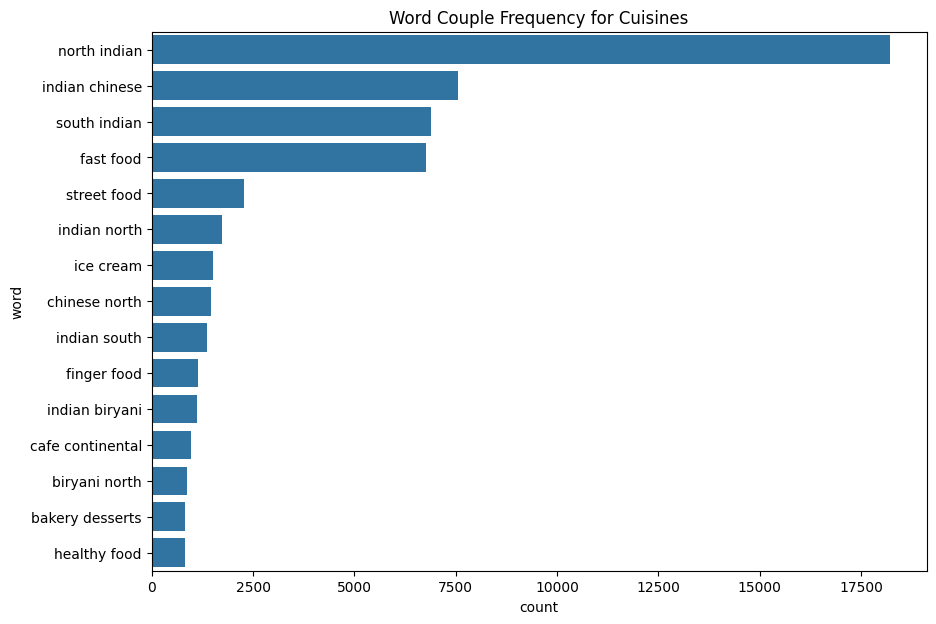

In [14]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_words, x='count', y='word')
plt.title('Word Couple Frequency for Cuisines')
plt.show()

In [15]:
# Group by 'name' column and calculate the mean of 'rate' column
grouped_restaurants = zomato_df.groupby('name', as_index=False)['rate'].mean().round(2)

# Combine all reviews and cuisines for each unique name
combined_restaurants = zomato_df.groupby('name', as_index=False).agg({'reviews_list': 'sum', 'cuisines': 'sum'})

# Merge the two dataframes on 'name' column
merged_restaurants = pd.merge(grouped_restaurants, combined_restaurants, on='name')

# Create a 'tags' column
merged_restaurants['tags'] = merged_restaurants['reviews_list'] + merged_restaurants['cuisines']

# Drop unnecessary columns
final_df = merged_restaurants.drop(columns=['reviews_list', 'cuisines'])

# Add 'cost' column to the new dataframe
final_df['cost'] = zomato_df['cost']

In [16]:
# Use CountVectorizer for text vectorization
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
tags_vector = vectorizer.fit_transform(final_df['tags']).toarray()

# Calculate cosine similarity
similarity_matrix = cosine_similarity(tags_vector)


In [21]:
# Function to recommend restaurants
def recommend_similar_restaurants(target_restaurant):
    target_restaurant_lower = preprocess_text(target_restaurant)

    if target_restaurant_lower not in final_df['name'].str.lower().values:
        print(f"Restaurant '{target_restaurant}' data not found.")
        return

    target_index = final_df[final_df['name'].str.lower() == target_restaurant_lower].index[0]
    distances = sorted(enumerate(similarity_matrix[target_index]), reverse=True, key=lambda x: x[1])

    print(f"Top 10 recommended restaurants for '{target_restaurant}':")
    for i in distances[1:11]:
        recommended_restaurant = final_df.iloc[i[0]]['name']
        print(recommended_restaurant)


In [22]:
recommend_similar_restaurants("Red Chilliez")

Top 10 recommended restaurants for 'Red Chilliez':
Melange - Hotel Ekaa
Inchara Restaurant
Wazir's
Punjabi Tasty Khana
Garma Garam
Swad
B.M.W - Bhookh Mitaane Wala
Punjabi Dawat
Marwa Restaurant
Foodiction


In [23]:
recommend_similar_restaurants("Cinnamon")

Top 10 recommended restaurants for 'Cinnamon':
Marwa Restaurant
3 Spice
Status
Spice Up
Lalchee's Rasoi
Tamarind
Aaranya Restaurant
Beach Hut
Red Chilliez
Swad 'E' Punjab


In [24]:
recommend_similar_restaurants("1947")

Top 10 recommended restaurants for '1947':
Atithi
The Rasoiya Street
Flavours - Octave Hotel & Spa
Paprica
The Onyx - The HHI Select Bengaluru
Cinnamon
Nouvelle Garden
Palki's
Thamboola
TBC Sky Lounge


In [25]:
recommend_similar_restaurants("Random Value")

Restaurant 'Random Value' data not found.
